# 회귀 실습

## 1. 문제 정의 
- 보스턴 집값 데이터 활용 집값 예측하기

## 2. 데이터 수집
from sklearn,datasets import load_boston
boston = load_boston()

In [4]:
import pandas as pd
house =pd.read_csv('boston_house_prices.csv', header =1)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 3단계 데이터 전처리
## 4단계 탐색적 데이터 분석
- 생략

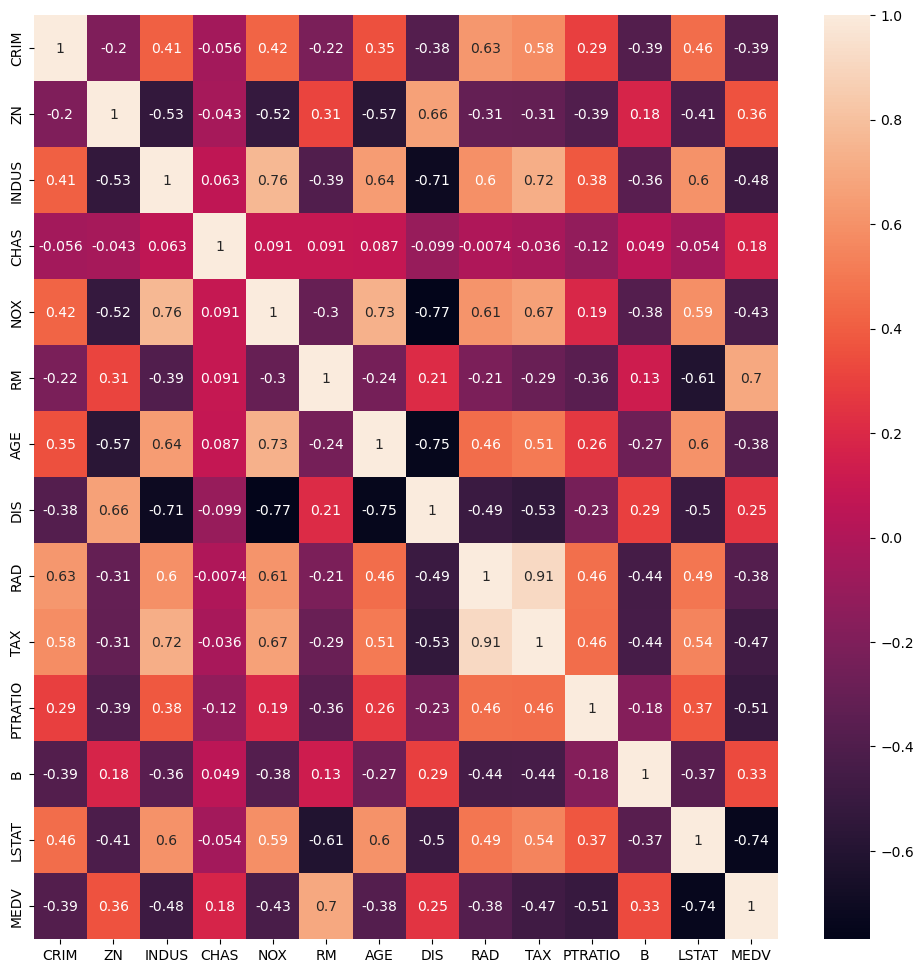

In [5]:
#상관관계 분석
#값이 -1 부터 1까지 분포
#0에 가까울 수록 연관이 없다(상관관계 가 없다) -->피어슨 상관계수
#1에 가까울 수록 양의 상관관계 
#-1에 가까울 수록 음의 상관관계 
#하나의 값이 커지면 나머지 하나의 값도 커진다(양의 상관관계)
#하나의 값이 커지면 나머지 하나의 값이 작아진다(음의 상관관계)
# -도 좋고 +도 좋다 이게 중요한게 아니라 뭐가 연관이 있냐가 중요
#절대값이 1에 가까울수록 좋은 상관관계를 가지고 있다
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(house.corr(), annot=True) # annot = True : 수치표현
plt.show()
#집값과 연관이 큰 데이터는 남기고 연관이 작은 데이타는 없앤다
#한 0.3만 넘으면 많은 연관이 있다

## 5.모델선택 및 하이퍼파라미터 튜닝

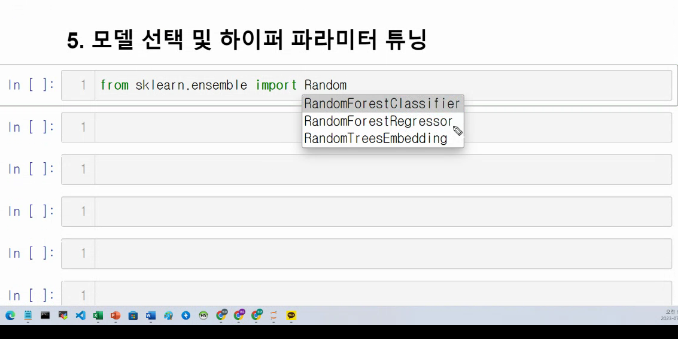

In [ ]:
classifier 는 분류 Regressor이 회귀

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()

In [9]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
X=house.loc[:,"CRIM":"LSTAT"]
y =house.loc[:,"MEDV"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,random_state =3)

In [20]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
rf.score(X_train,y_train)

0.9823398588573174

In [23]:
rf.score(X_test,y_test)

0.979579772633825

In [26]:
from sklearn.model_selection import cross_val_score
score =cross_val_score(rf,X_train, y_train ,cv =6)

In [27]:
score.mean()

0.8690799584402574

## Gridsearch

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
d_param = {'max_features' : [0.4, 0.5, 0.6, 0.7],
             'n_estimators' : [50, 100, 150, 200],
             'max_depth' : [4,5,6,7,8],
             'max_leaf_nodes' : [300,400,500,600]}gri

In [31]:
grid_search = GridSearchCV(RandomForestClassifier().grid_param, cv =5)

NameError: name 'RandomForestClassifier' is not defined

In [32]:
from sklearn.model_selection import GridSearchCV
grid_param = {'max_features' : [0.4, 0.5, 0.6, 0.7],
             'n_estimators' : [50, 100, 150, 200],
             'max_depth' : [4,5,6,7,8],
             'max_leaf_nodes' : [30,40,50,60]}

In [34]:
grid_search =GridSearchCV(RandomForestRegressor(),grid_param,cv=5)

In [36]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [0.4, 0.5, 0.6, 0.7],
                         'max_leaf_nodes': [300, 400, 500, 600],
                         'n_estimators': [50, 100, 150, 200]})

In [37]:
grid_search.best_score_

0.8774207366648834

In [ ]:
grid_param = {'max_features' : [0.4, 0.5, 0.6, 0.7],
             'n_estimators' : [50, 100, 150, 200],
             'max_depth' : [4,5,6,7,8],
             'max_leaf_nodes' : [30,40,50,60]}

In [43]:
grid_search =GridSearchCV(RandomForestRegressor(), grid_param, cv =5)

In [44]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [0.4, 0.5, 0.6, 0.7],
                         'max_leaf_nodes': [300, 400, 500, 600],
                         'n_estimators': [50, 100, 150, 200]})

In [46]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, max_features=0.4, max_leaf_nodes=500,
                      n_estimators=50)

In [ ]:
# max_depth=8, max_features=0.4, max_leaf_nodes=500,

In [47]:
grid_search.best_score_

0.8847704520216816

In [ ]:
그리드 터치에 x데어 집어 넣어둬 프레딕트 넣어서 예측

## 피클형태로 저장

In [48]:
#머신러닝모델을 파일형태로 저장하기
#보통 피클이라는 형태로 사용 
import joblib#머신러닝모델 저장하는 라이브러리
joblib.dump(grid_search,'house_rf.pkl')

['house_rf.pkl']

In [ ]:
#파일이 나왔다는 것은 머신러닝모델로 파일 보냈다
#다음에는 학습을 다시 시키는 것이 아니라 그냥 불러와서 사용하면 된다

In [51]:
load_model= joblib.load('house_rf.pkl')

In [53]:
load_model.predict(X_test.iloc[:10])

array([41.33228841, 18.0716031 , 17.21501751, 30.95923459, 22.97445702,
       21.48813475, 15.15440243,  8.33602984, 20.83418884, 17.86311308])